In [1]:
import sys; sys.path.append('/sj0243/')

In [2]:
from python_for_nustar.nu_core import np, plt, fits, os, pd, set_mpl
from python_for_nustar.pipeline.sj0243_init import ObsList_bright, mjd_val, MJD_REF, Nu_path, plot_path, ObsAlias
from python_for_nustar.pyxspec_lib.nustar_xspec import scan_containers_ph_ave, load_nu_spe, plot_spe_nu
from python_for_nustar.pyxspec_lib.definitions import make_figure, xspec, Model, Fit, Plot, AllData, AllModels, glob

# Latex Tables

In [3]:

AllModels.lmod('relxill', '/sj0243/python_for_nustar/relxill_model/')
def get_ph_ave_res(ObsID, model = 'relxilllp'):
    os.chdir(f'/sj0243/results/out{ObsID}/products/spe_and_lc/')
    ph_ave_res = scan_containers_ph_ave(model=model)
    return ph_ave_res

def val_to_latex(val, lower, upper, k = 3, frozen = False):

    if type(val)==str:
        if val.startswith('chi2'):
            return val.split(' ', 1)[1]
    my_formatter = f"{{:.{k}f}}"
    str_val = my_formatter.format(val)

    if lower==upper==0 and frozen:
        return str_val +'(fix)'

    err_lo = val - lower
    err_up = upper - val
    
    str_err_lo = my_formatter.format(err_lo)
    str_err_up = my_formatter.format(err_up)

    if str_err_lo==str_err_up:
        #return f"{str_val}\\pm{str_err_up}"
        return '$'+str_val + '\\pm' +str_err_up+'$'
    else:
        #return f"{str_val}^{{+{str_err_up}}}_{{-{str_err_lo}}}"
        return '$'+str_val+'^{+'+str_err_up+'}_{-'+str_err_lo+'}$'





In [4]:
ph_ave_cutoffpl = pd.DataFrame()
for ObsID in ObsList_bright:
    q = get_ph_ave_res(ObsID)
    ph_ave_cutoffpl = pd.concat((ph_ave_cutoffpl,q))

ph_ave_cutoffpl['latex_str'] = ph_ave_cutoffpl.apply(lambda x: val_to_latex(x['val'], x['error_l'], x['error_u'], frozen=x['frozen']), axis = 1)
ph_ave_cutoffpl_latex = ph_ave_cutoffpl[['latex_str']]
ph_ave_cutoffpl_latex = ph_ave_cutoffpl_latex.reset_index()
ph_ave_cutoffpl_latex = ph_ave_cutoffpl_latex.drop('model', axis = 1)
ph_ave_cutoffpl_latex = ph_ave_cutoffpl_latex.pivot(index = ['comp', 'par'], columns = 'ObsID', values = 'latex_str').fillna('-')
sorting = ['constant', 'phabs', 'relxilllp', 'bbodyrad', 'stat', 'flux']
ph_ave_cutoffpl_latex = ph_ave_cutoffpl_latex.loc[sorting, :]
ph_ave_cutoffpl_latex.columns = [ObsAlias[x] for x in ph_ave_cutoffpl_latex.columns]
ph_ave_cutoffpl_latex

I (90302319002)  \
comp      par                                          
constant  factor                     $1.011\pm0.002$   
phabs     nH                              0.800(fix)   
relxilllp Afe                             5.000(fix)   
          Ecut            $25.648^{+0.952}_{-0.885}$   
          Incl                           10.000(fix)   
          Rin             $42.973^{+6.947}_{-5.497}$   
          Rout         $47.270^{+-47.270}_{-47.270}$   
          a                               0.000(fix)   
          fixReflFrac                     0.000(fix)   
          gamma                      $1.123\pm0.021$   
          h                               5.000(fix)   
          logxi            $3.347^{+0.093}_{-0.115}$   
          norm                       $0.021\pm0.000$   
          refl_frac        $0.075^{+0.011}_{-0.009}$   
          z                               0.000(fix)   
bbodyrad  kT                         $3.105\pm0.027$   
          norm             $2.058^{+0.051}_{-0.049}$   
stat      chi2                          2416.38/2292   
flux      flux                                   ---   

                                     II (90302319004)  \
comp      par                                           
constant  factor                      $0.999\pm0.001$   
phabs     nH                               0.800(fix)   
relxilllp Afe                              5.000(fix)   
          Ecut             $20.941^{+0.519}_{-0.497}$   
          Incl                            10.000(fix)   
          Rin              $70.225^{+7.007}_{-6.729}$   
          Rout          $77.247^{+-77.247}_{-77.247}$   
          a                                0.000(fix)   
          fixReflFrac                      0.000(fix)   
          gamma                       $1.273\pm0.027$   
          h                                5.000(fix)   
          logxi             $3.524^{+0.030}_{-0.032}$   
          norm              $0.445^{+0.011}_{-0.010}$   
          refl_frac         $0.182^{+0.011}_{-0.008}$   
          z                                0.000(fix)   
bbodyrad  kT                          $1.228\pm0.007$   
          norm         $1085.682^{+53.610}_{-56.570}$   
stat      chi2                           2557.92/2310   
flux      flux                                    ---   

                                   III (90302319006)  \
comp      par                                          
constant  factor                     $0.992\pm0.002$   
phabs     nH                              0.800(fix)   
relxilllp Afe                             5.000(fix)   
          Ecut            $20.455^{+0.520}_{-0.546}$   
          Incl                           10.000(fix)   
          Rin             $53.046^{+5.528}_{-4.958}$   
          Rout         $58.351^{+-58.351}_{-58.351}$   
          a                               0.000(fix)   
          fixReflFrac                     0.000(fix)   
          gamma            $1.318^{+0.027}_{-0.030}$   
          h                               5.000(fix)   
          logxi            $3.682^{+0.036}_{-0.027}$   
          norm             $0.653^{+0.018}_{-0.019}$   
          refl_frac        $0.242^{+0.013}_{-0.014}$   
          z                               0.000(fix)   
bbodyrad  kT               $1.439^{+0.023}_{-0.020}$   
          norm         $613.840^{+90.021}_{-81.625}$   
stat      chi2                          2290.53/2171   
flux      flux                                   ---   

                                    IV (90302319008)  \
comp      par                                          
constant  factor                     $0.999\pm0.001$   
phabs     nH                              0.800(fix)   
relxilllp Afe                             5.000(fix)   
          Ecut            $17.703^{+0.333}_{-0.288}$   
          Incl                           10.000(fix)   
          Rin             $52.560^{+4.522}_{-5.046}$   
          Rout         $57.816^{+-57.

In [5]:
print(ph_ave_cutoffpl_latex.to_latex(escape=False))

\begin{tabular}{lllllll}
\toprule
     &      &                I (90302319002) &                II (90302319004) &              III (90302319006) &               IV (90302319008) &                V (90401334002) \\
comp & par &                                &                                 &                                &                                &                                \\
\midrule
constant & factor &                $1.011\pm0.002$ &                 $0.999\pm0.001$ &                $0.992\pm0.002$ &                $0.999\pm0.001$ &                $1.017\pm0.001$ \\
phabs & nH &                     0.800(fix) &                      0.800(fix) &                     0.800(fix) &                     0.800(fix) &                     0.800(fix) \\
relxilllp & Afe &                     5.000(fix) &                      5.000(fix) &                     5.000(fix) &                     5.000(fix) &                     5.000(fix) \\
     & Ecut &     $25.648^{+0.952}_{-0.885}$

/tmp/ipykernel_47588/463496331.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ph_ave_cutoffpl_latex.to_latex(escape=False))


# Spectral plots

In [13]:
set_mpl()
AllModels.lmod('relxill', '/sj0243/python_for_nustar/relxill_model/')

def plot_relf_spe(
    ObsIDs,
    min_sig = 90,
):
    ms, alpha, lw = 4, 0.7, 3


    fig = plt.figure(figsize=(8, 12))
    plotwidth = 4
    rows = len(ObsIDs)+plotwidth
    cols = 1
    ax = plt.subplot2grid((rows, cols), (0, 0), rowspan=plotwidth, colspan=1)
    ax_delchi = [plt.subplot2grid((rows, cols), (i, 0),
                                rowspan=1, colspan=1, sharex=ax) for i in range(plotwidth, rows)]
    plt.subplots_adjust(hspace=0)


    for i, ObsID in enumerate(ObsIDs):
        os.chdir(f"/sj0243/results/out{ObsID}/products/spe_and_lc")
        xspec.AllData.clear()
        xspec.AllModels.clear()
        model = 'relxilllp'
        xspec.Xset.restore(f'/sj0243/results/out{ObsID}/products/spe_and_lc/xspec/{model}/xcm/{ObsID}_{model}.xcm')

        mo_loaded = xspec.AllModels(1)
        refl_fract = mo_loaded.relxilllp.refl_frac.values[0]
        refl_fract = f"{refl_fract:.2f}"

        label = f'{ObsAlias[ObsID]}'
        

        for gr, m, l in zip([1,2], ['o', 's'], [label, '_'+ label]):
            Plot.device = "/null"
            Plot.setRebin(min_sig, min_sig)
            Plot("eeufs")
            Plot.xAxis = "keV"
            en = np.array(Plot.x(gr))
            data = np.array(Plot.y(gr))
            en_err = np.array(Plot.xErr(gr))
            data_err = np.array(Plot.yErr(gr))

            ax.loglog(en, data, marker = m, lw = 0, alpha = alpha, ms = ms)#, zorder = 10)   
            color =  ax.get_lines()[-1].get_color()         
            ax.errorbar(en, data, data_err, en_err,
                            fmt='none', ecolor=color, alpha=alpha*0.7, label=l)#, zorder = 9)

            Plot("del")
            Plot.xAxis = "keV"
            en = np.array(Plot.x(gr))
            delchi = np.array(Plot.y(gr))
            en_err = np.array(Plot.xErr(gr))
            delchi_err = np.array(Plot.yErr(gr))

            ax_delchi[i].semilogx(en, delchi, marker = m, lw = 0, alpha = alpha, ms = ms, color = color)
            ax_delchi[i].errorbar(en, delchi, delchi_err, en_err,
                            fmt='none', ecolor=color, alpha=alpha*0.7, label=l)#, zorder = 9)
            ax_delchi[i].set_ylabel("$\chi$")
        
        l = ax_delchi[i].legend([ObsAlias[ObsID]] ,loc = 'lower right', fontsize = '15', framealpha = 0.0, handletextpad=-2.0, handlelength=0)
        l.set_zorder(-1)
        for lh in l.legendHandles:
            lh.set_alpha(1)

        xspec.Xset.restore(f'/sj0243/results/out{ObsID}/products/spe_and_lc/xspec/{model}/xcm/{ObsID}_{model}.xcm_model')

        mo_loaded = xspec.AllModels(1)
        refl_fract = mo_loaded.relxilllp.refl_frac.values[0]
        refl_fract = f"{refl_fract:.2f}"
        #mo_loaded.relxilllp.refl_frac = "-"+str(refl_fract)
        #mo_loaded.bbodyrad.norm = '0 -1'
        Plot("eeufs")
        Plot.xAxis = "keV"
        en = np.array(Plot.x())
        data = np.array(Plot.model())
        ax.loglog(en, data, lw = lw, alpha = alpha, ls = '-', color = color)   


        xspec.Xset.restore(f'/sj0243/results/out{ObsID}/products/spe_and_lc/xspec/{model}/xcm/{ObsID}_{model}.xcm_model')
        mo_loaded = xspec.AllModels(1)
        refl_fract = mo_loaded.relxilllp.refl_frac.values[0]
        mo_loaded.relxilllp.refl_frac = "-"+str(refl_fract)
        mo_loaded.bbodyrad.norm = '0 -1'

        Plot("eeufs")
        Plot.xAxis = "keV"
        en = np.array(Plot.x())
        data = np.array(Plot.model())
        ax.loglog(en, data, lw = lw, alpha = alpha, ls = ':', color = color)   


        xspec.Xset.restore(f'/sj0243/results/out{ObsID}/products/spe_and_lc/xspec/{model}/xcm/{ObsID}_{model}.xcm_model')
        mo_loaded = xspec.AllModels(1)
        refl_fract = mo_loaded.relxilllp.refl_frac.values[0]
        mo_loaded.relxilllp.refl_frac = '0 -1'
        mo_loaded.bbodyrad.norm = '0 -1'

        Plot("eeufs")
        Plot.xAxis = "keV"
        en = np.array(Plot.x())
        data = np.array(Plot.model())

        ax.loglog(en, data, lw = lw, alpha = alpha, ls = '--', color = color)   


        xspec.Xset.restore(f'/sj0243/results/out{ObsID}/products/spe_and_lc/xspec/{model}/xcm/{ObsID}_{model}.xcm_model')
        mo_loaded = xspec.AllModels(1)
        refl_fract = mo_loaded.relxilllp.refl_frac.values[0]
        mo_loaded.relxilllp.norm = '0'

        Plot("eeufs")
        Plot.xAxis = "keV"
        en = np.array(Plot.x())
        data = np.array(Plot.model())

        ax.loglog(en, data, lw = lw, alpha = alpha/2, ls = '-.', color = color)   




        ax.set_xscale("log")
        ax_delchi[-1].set_xlabel("Energy (keV)")


        ax.set_ylabel('$E^2F_E, keV^2 (phot\, cm^{-2} s^{-1} keV^{-1})$', fontsize = 14)
        ax.set_xticks([4, 6, 7, 10, 20, 40, 80])
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    
    if ObsList_bright[0] in ObsIDs or ObsList_bright[1] in ObsIDs:
        ax.set_ylim(0.03,3)
    if ObsList_bright[1] in ObsIDs or ObsList_bright[2] in ObsIDs or ObsList_bright[3] in ObsIDs:
        ax.set_ylim(0.6,100)


    return fig, ax





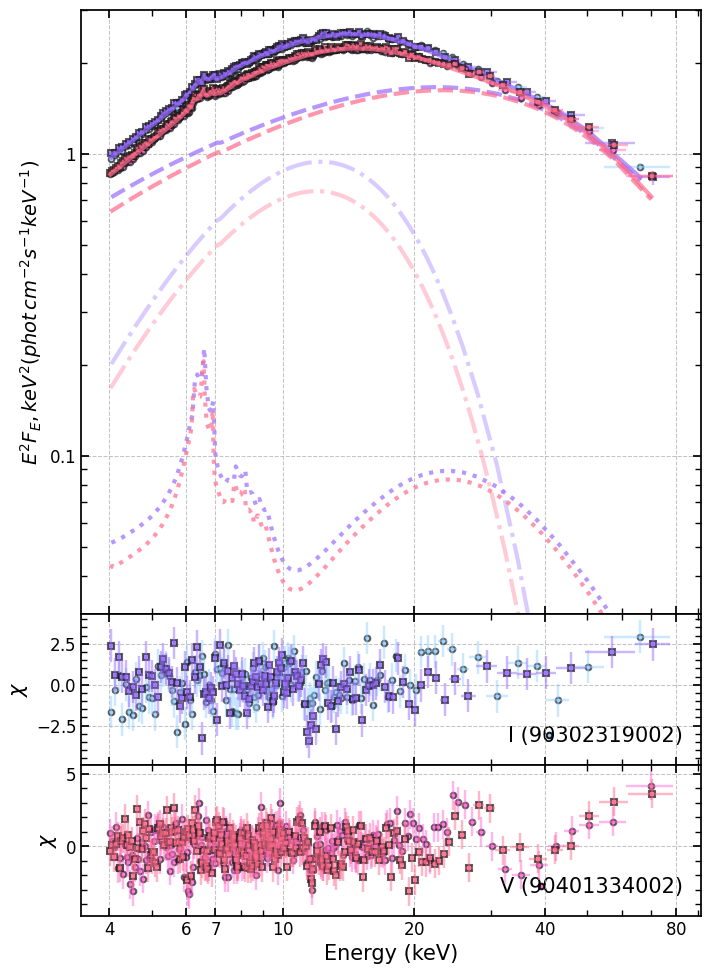

In [14]:
fig, ax = plot_relf_spe([ObsList_bright[0], ObsList_bright[-1]])
fig.savefig(plot_path+ 'spe_low.pdf')



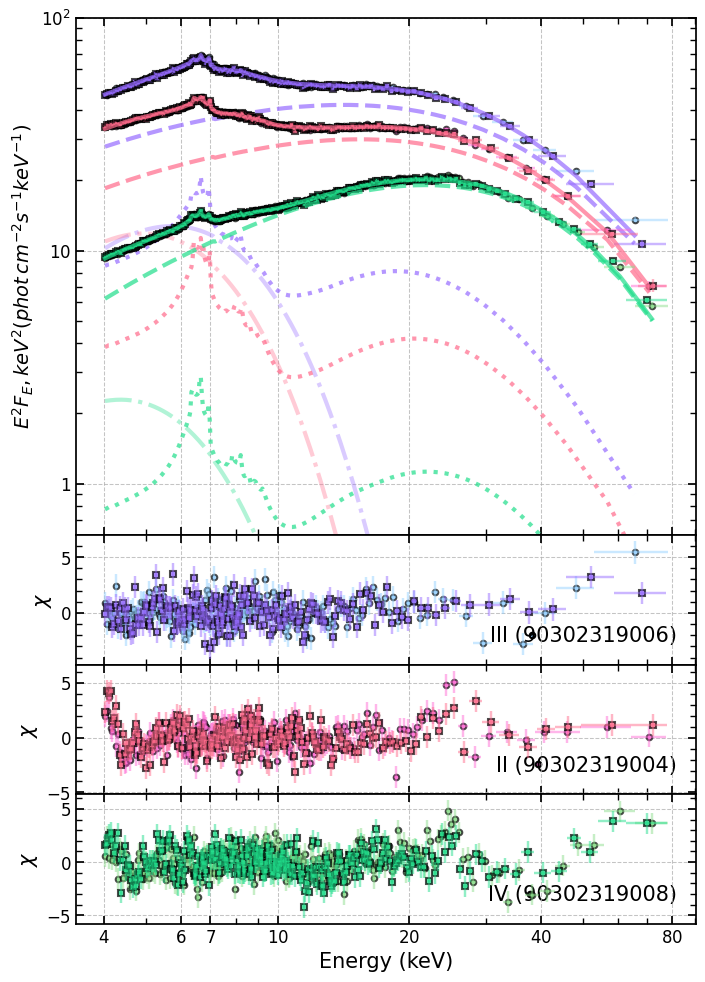

In [8]:
fig, ax = plot_relf_spe([ObsList_bright[2], ObsList_bright[1], ObsList_bright[3]])
fig.savefig(plot_path+ 'spe_high.pdf')


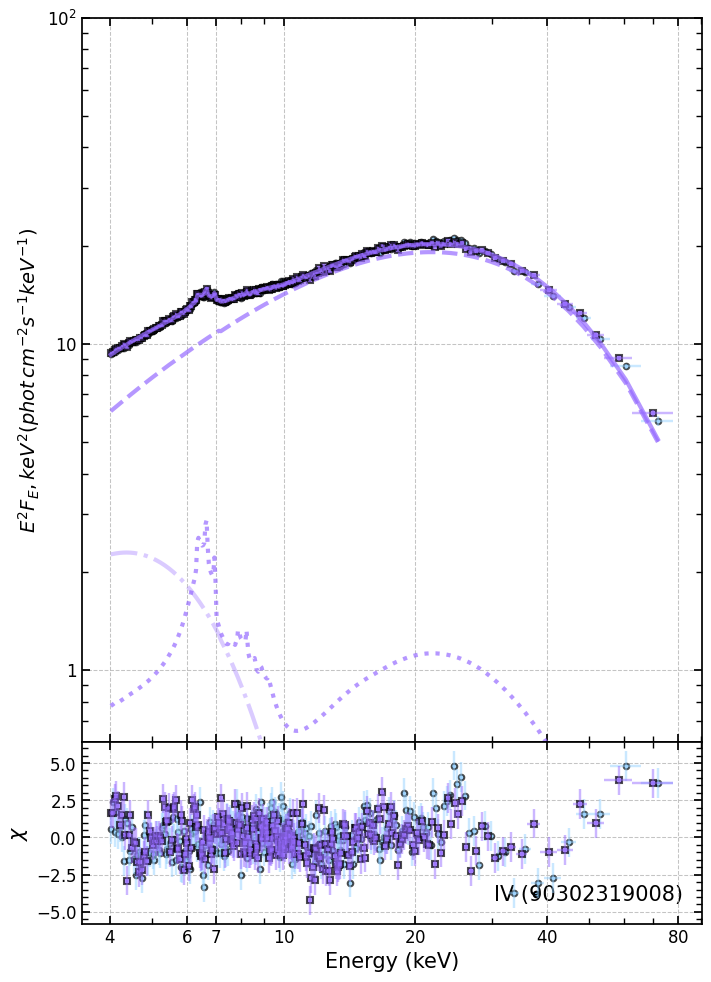

In [12]:
fig, ax = plot_relf_spe([ObsList_bright[3]])
